<a href="https://colab.research.google.com/github/Priyo-prog/Machine-Learning/blob/main/K-Nearest%20Neighbour/K_nearest_neighbour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighbour**

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data
3.1 Calculate the distance between the query example and the current example from the data.
3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import the dataset

In [2]:
# Mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/Data Science/Machine Learning

/content/drive/MyDrive/Data Science/Machine Learning


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Social_Network_Ads.csv', sep=',')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]
 [-0.56234321  2.33980255]
 [ 1.0088136  -1.19473064]
 [-0.75873781  1.08372877]
 [ 2.1871812  -1.04867555]
 [ 0.0268406  -0.25997806]
 [-0.46414591 -1.1363086 ]
 [ 0.1250379   0.03213212]
 [ 1.6961947  -0.90262046]
 [ 1.1070109  -0.90262046]
 [ 0.5178271   1.22978386]
 [-1.05332971 -1.4576298 ]
 [-1.15152701 -1.54526286]
 [-0.0713567   0.67477452]
 [ 0.4196298  -0.46445519]
 [-0.2677513  -0.25997806]
 [-0.85693511  0.14897619]
 [ 0.0268406   0.29503128]
 [ 0.7142217  -1.28236369]
 [ 1.5979974   1.11293979]
 [ 0.812419   -1.36999675]
 [-1.44611891 -1.22394166]
 [-0.0713567   0.14897619]
 [ 0.4196298  -0.14313399]
 [-0.2677513   0.03213212]
 [ 1.3034055   2.22295848]
 [ 0.1250379   0.76240757]
 [-1.34792161  0.55793045]
 [ 1.9907866   0.73319655]
 [-1.24972431 -1.39920777]
 [ 0.3214325  -0.3184001 ]
 [-0.95513241  0.55793045]
 [ 0.4196298   0.29503128]
 

## Training the K-NN model on the Training set

* 
n_neighbors : int, default=5
Number of neighbors to use by default for kneighbors queries.

* metric : str or callable, default=’minkowski’
The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. For a list of available metrics, see the documentation of DistanceMetric. If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.

* p : int, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [9]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


## Save the Model

In [13]:
import pickle

with open("classifier.pkl", "wb") as pickle_out:
  pickle.dump(classifier, pickle_out)
  pickle_out.close()

## Creating the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[59  4]
 [ 3 34]]


0.93

## Visualizing the training set result

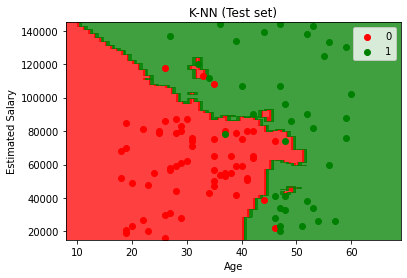

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()